# Online Retails Purchase

Referência: https://github.com/guipsamora/pandas_exercises/blob/master/07_Visualization/Online_Retail/Exercises_with_solutions_code.ipynb

### Import the necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Dataset

#### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

####  Attribute Information:

*InvoiceNo:* Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. <br>
*StockCode:* Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>
*Description:* Product (item) name. Nominal. <br>
*Quantity:* The quantities of each product (item) per transaction. Numeric. <br>
*InvoiceDate:* Invice Date and time. Numeric, the day and time when each transaction was generated. <br>
*UnitPrice:* Unit price. Numeric, Product price per unit in sterling. <br>
*CustomerID:* Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br>
*Country*: Country name. Nominal, the name of the country where each customer resides. 
<br>
<br>
<br>

Utilize os dados do arquivo em <a href="https://archive.ics.uci.edu/ml/datasets/online+retail">'data/Online_Retail.csv'</a> para esses exercícios.
Obs: se encontrar um erro de utf-8 decode, adicione o `encoding = 'latin1'` na leitura dos dados.

In [40]:
path = 'data/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 08:26,3.39,17850.0,United Kingdom


In [43]:
online_rt.InvoiceDate.min()

'1/11/2011 08:16'

### Análise geral dos dados
Aproveite esse espaço para entender melhor seus dados, sua estrutura e estatística básica. <br> 
Você consegue perceber algo de estranho?

In [11]:
online_rt.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31/10/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611121,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [12]:
online_rt.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
online_rt.shape

(541909, 8)

Resolva o problema encontrado nos dados

In [14]:
online_rt.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
# checa existência de duplicados
online_rt.duplicated().sum()

5268

In [16]:
# elimina duplicados
online_rt = online_rt.drop_duplicates()

In [17]:
online_rt = online_rt.query("Quantity>0 and UnitPrice>=0")
# online_rt = online_rt[online_rt.Quantity > 0]

Crie um histograma com os dados de UnitPrice e um com Quantity em uma mesma Figure. Adicione título a cada gráfico

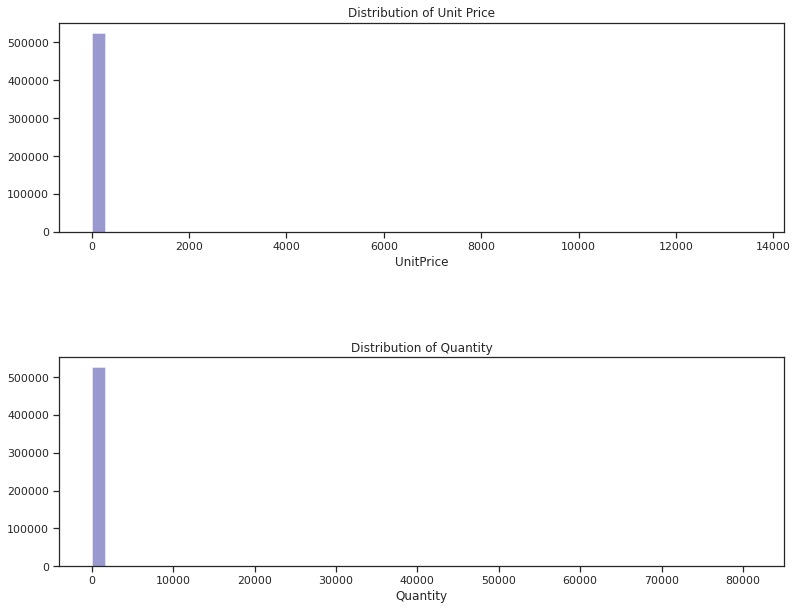

In [33]:
fig, axs = plt.subplots(2,1, figsize=(13,10))
sns.distplot(online_rt['UnitPrice'], color = 'darkblue', kde=False, ax=axs[0])
sns.distplot(online_rt['Quantity'], color = 'darkblue', kde=False, ax=axs[1])
axs[0].set_title("Distribution of Unit Price")
axs[1].set_title("Distribution of Quantity")

fig.subplots_adjust(hspace=0.6)

Crie um gráfico de barras com os 10 países com maior quantidade comprada, com exceção do UK contendo labels para o eixo x, y e título

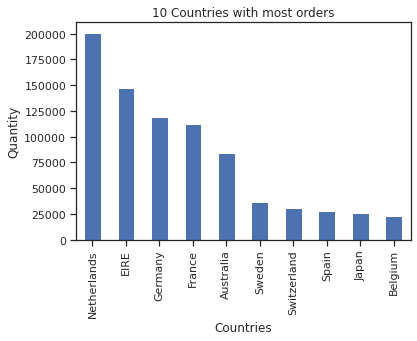

In [19]:
# group by the Country
countries = online_rt.groupby('Country').sum()

# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

# create the plot
countries['Quantity'].plot(kind='bar')

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

E por receita financeira?

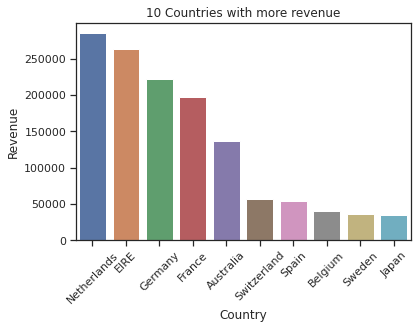

In [48]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice

country_revenue = online_rt.groupby("Country")["Revenue"].sum().reset_index()\
                           .sort_values(by='Revenue', ascending=False)[1:11]

# create the plot
sns.barplot(data=country_revenue, x='Country', y='Revenue')

# Set the title and labels
plt.title('10 Countries with more revenue')
plt.xticks(rotation=45)

# show the plot
plt.show()

Encontre os 10 `CustomerID` dos top 3 países selecionados acima que possuem o maior preço médio por unidade durante esse período.

In [39]:
top3 = countries.index[0:3]
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

plottable.sort_values('AvgPrice', ascending=False).head(10)

/home/patricia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,,Quantity,Revenue,AvgPrice
CustomerID,Country,,,
12789.0,Netherlands,4,91.85,22.962500
13811.0,Germany,68,814.50,11.977941
12603.0,Germany,64,739.20,11.550000
12504.0,Germany,90,482.05,5.356111
13810.0,Germany,312,1499.01,4.804519
12614.0,Germany,76,315.60,4.152632
12712.0,Germany,1062,4396.13,4.139482
12702.0,Germany,53,219.00,4.132075
12477.0,Germany,3653,13219.74,3.618872


Crie uma coluna 'YearMonth' e faça um único gráfico que contenha a receita e quantidade vendida ao longo do tempo.

In [45]:
# Converte coluna de data para datetime e remove hh:mm
# online_rt.InvoiceDate = pd.to_datetime(online_rt.InvoiceDate, format='%m/%d/%y %H:%M').dt.date

online_rt['YearMonth'] = pd.to_datetime(online_rt['InvoiceDate']).dt.strftime('%Y%m')

/home/patricia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


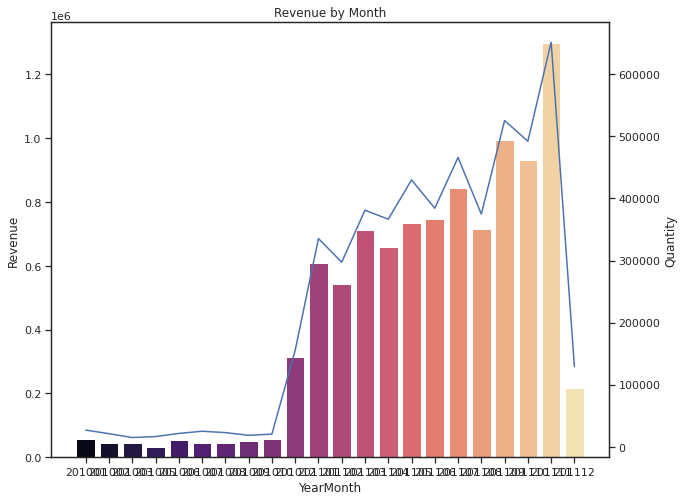

In [53]:
Month_revenue = online_rt.groupby("YearMonth")['Revenue','Quantity'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x = Month_revenue.YearMonth, y = Month_revenue.Revenue, palette = 'magma')
ax2 = plt.twinx()

sns.lineplot(x = Month_revenue.YearMonth, y = Month_revenue.Quantity, ax=ax2)

plt.title('Revenue by Month')
plt.xlabel("Month")
# plt.ylabel("Revenue")
# ax2.ylabel("Quantity")
plt.xticks(rotation=45);

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.



Crie intervalos de uma unidade para a coluna `UnitPrice` para valores entre [0,50) e plote um gráfico quantidade vendida por receita financeira. Dê nome aos eixos e deixe os xtickers bonitos.

In [56]:
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets, labels=buckets[1:])).Revenue.sum()
revenue_per_price.head()

UnitPrice
1    1.089072e+06
2    2.557511e+06
3    1.803382e+06
4    8.499193e+05
5    1.199347e+06
Name: Revenue, dtype: float64

In [55]:
online_rt.UnitPrice.max()

38970.0

In [58]:
revenue_per_price.reset_index().head()

,UnitPrice,Revenue
0,1,1.089072e+06
1,2,2.557511e+06
2,3,1.803382e+06
3,4,8.499193e+05
4,5,1.199347e+06


<AxesSubplot:xlabel='UnitPrice', ylabel='Revenue'>

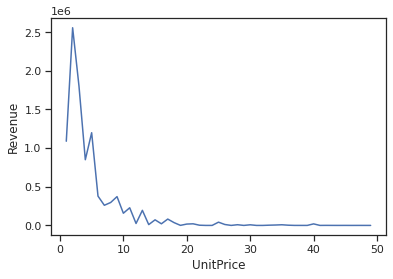

In [61]:
sns.lineplot(data=revenue_per_price.reset_index(), x='UnitPrice',y='Revenue')

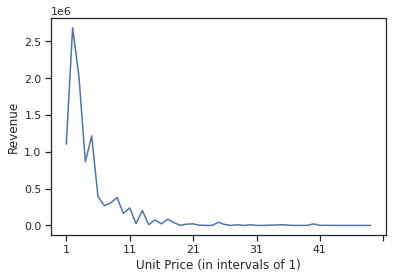

In [25]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

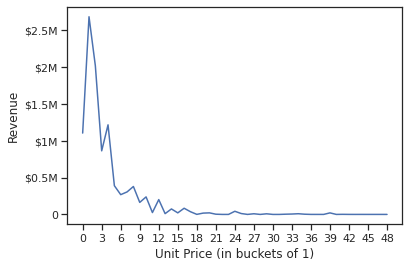

In [26]:
# segunda forma de deixar o xticker bonito
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

#Looks like a major chunk of our revenue comes from items worth $0-$3!

### BONUS: Bar Chart Race

Utilize a biblioteca <a href='https://www.dunderdata.com/blog/official-release-of-bar_chart_race-a-python-package-for-creating-animated-bar-chart-races'>bar chart race</a> para criar um gráfico animado com a quantidade vendida no online market por país e ano-mês.

In [27]:
# !pip install bar_chart_race

In [28]:
# Converte coluna de data para datetime e remove hh:mm
# online_rt.InvoiceDate = pd.to_datetime(online_rt.InvoiceDate, format='%m/%d/%y %H:%M').dt.date

In [29]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 08:26,2.55,17850.0,United Kingdom,15.30,201001
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 08:26,3.39,17850.0,United Kingdom,20.34,201001
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 08:26,2.75,17850.0,United Kingdom,22.00,201001
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 08:26,3.39,17850.0,United Kingdom,20.34,201001
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 08:26,3.39,17850.0,United Kingdom,20.34,201001


In [62]:
pivot = pd.pivot_table(online_rt, 
                       index='YearMonth', 
                       columns='Country', 
                       values='Quantity', 
                       aggfunc='sum')

In [63]:
pivot

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
YearMonth,,,,,,,,,,,,,,,,,,,,,
201001,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23949.0,NaN
201002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20873.0,NaN
201003,NaN,NaN,NaN,528.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,400.0,NaN,110.0,NaN,NaN,10439.0,NaN
201005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13604.0,NaN
201006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20669.0,NaN
201007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23769.0,NaN
201008,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20086.0,NaN
201009,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,454.0,...,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,14545.0,NaN
201010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18273.0,NaN


In [31]:
online_rt.loc[online_rt['Country'].isin(['France','Australia','USA'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,1/12/2010 08:45,3.75,12583.0,France,90.00,201001
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,1/12/2010 08:45,3.75,12583.0,France,90.00,201001
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,1/12/2010 08:45,3.75,12583.0,France,45.00,201001
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,1/12/2010 08:45,0.85,12583.0,France,10.20,201001
30,536370,21883,STARS GIFT TAPE,24,1/12/2010 08:45,0.65,12583.0,France,15.60,201001
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France,10.20,201109
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France,12.60,201109
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France,16.60,201109
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France,16.60,201109


In [68]:
import bar_chart_race as bcr
bcr.bar_chart_race(pivot[top3], n_bars=7, filter_column_colors=False, steps_per_period=5, period_length=1000)

/home/patricia/.local/lib/python3.6/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/patricia/.local/lib/python3.6/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
